# InceptionV3 model:

Description:
    
    InceptionV3 model with transfer learning will be used to train 
    
    
    

# Imports:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
from keras.models import load_model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models


# Generators:

In [7]:
n_classes = 101
batch_size = 16
width, height = 200, 200
train_data = './food-101/train'
test_data = './food-101/test'
train_samples = 75750
test_samples = 25250

train_data_gen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1. / 255)

train_gen = train_data_gen.flow_from_directory(train_data, 
                                               target_size=(height, width), 
                                               batch_size=batch_size, 
                                               class_mode='categorical')

test_gen = test_data_gen.flow_from_directory(test_data, 
                                             target_size=(height, width),
                                             batch_size=batch_size, 
                                             class_mode='categorical')


Found 75750 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


# Model:

In [9]:
inception = InceptionV3(weights='imagenet', include_top=False)
layer = inception.output
layer = GlobalAveragePooling2D()(layer)
layer = Dense(128,activation='relu')(layer)
layer = Dropout(0.2)(layer)

predictions = Dense(n_classes,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(layer)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_101class.hdf5', save_best_only=True)
csv_logger = CSVLogger('history_101class.log')


In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d_94 (Conv2D)             (None, None, None,   864         ['input_2[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization_94 (BatchN  (None, None, None,   96         ['conv2d_94[0][0]']              
 ormalization)                  32)                                                         

                                192)                                                              
                                                                                                  
 conv2d_163 (Conv2D)            (None, None, None,   147456      ['average_pooling2d_15[0][0]']   
                                192)                                                              
                                                                                                  
 batch_normalization_154 (Batch  (None, None, None,   576        ['conv2d_154[0][0]']             
 Normalization)                 192)                                                              
                                                                                                  
 batch_normalization_157 (Batch  (None, None, None,   576        ['conv2d_157[0][0]']             
 Normalization)                 192)                                                              
          

Trainable params: 22,043,653
Non-trainable params: 34,432
__________________________________________________________________________________________________


# Training:

In [10]:
history_101class = model.fit(train_gen, 
                             steps_per_epoch= train_samples // batch_size, 
                             validation_data= test_gen, 
                             validation_steps= test_samples // batch_size, 
                             epochs=10, callbacks=[csv_logger, checkpointer])

model.save('model_trained_101class.hdf5')

Epoch 1/10
4734/4734 [==============================] - 9960s 2s/step - loss: 4.8907 - accuracy: 0.0678 - val_loss: 4.0436 - val_accuracy: 0.2460
Epoch 2/10
4734/4734 [==============================] - 15042s 3s/step - loss: 3.8429 - accuracy: 0.2545 - val_loss: 2.8395 - val_accuracy: 0.4516
Epoch 3/10
4734/4734 [==============================] - 15776s 3s/step - loss: 3.1339 - accuracy: 0.3765 - val_loss: 2.3216 - val_accuracy: 0.5402
Epoch 4/10
4734/4734 [==============================] - 16166s 3s/step - loss: 2.7305 - accuracy: 0.4513 - val_loss: 2.0250 - val_accuracy: 0.5954
Epoch 5/10
4734/4734 [==============================] - 14285s 3s/step - loss: 2.4555 - accuracy: 0.5054 - val_loss: 1.8302 - val_accuracy: 0.6329
Epoch 6/10
4734/4734 [==============================] - 11228s 2s/step - loss: 2.2657 - accuracy: 0.5411 - val_loss: 1.6955 - val_accuracy: 0.6578
Epoch 7/10
4734/4734 [==============================] - 11661s 2s/step - loss: 2.1076 - accuracy: 0.5714 - val_loss: 1.

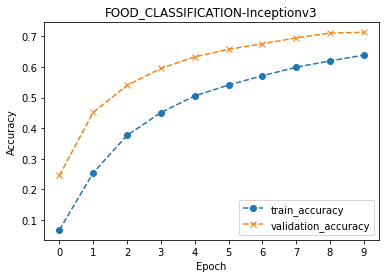

In [17]:
_ = plt.style.library['seaborn-darkgrid']
_ = plt.title('FOOD_CLASSIFICATION-Inceptionv3')
_ = plt.plot(history_101class.history['accuracy'], marker='o', linestyle='dashed')
_ = plt.plot(history_101class.history['val_accuracy'], marker='x', linestyle='dashed')
_ = plt.ylabel('Accuracy')
_ = plt.xlabel('Epoch')
_ = plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
plt.xticks(np.arange(10))
plt.show()

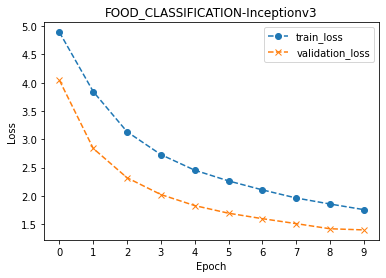

In [16]:
# Plot training-loss & validation-loss.
_ = plt.style.library['seaborn-darkgrid']
_ = plt.title('FOOD_CLASSIFICATION-Inceptionv3')
_ = plt.plot(history_101class.history['loss'], marker='o', linestyle='dashed')
_ = plt.plot(history_101class.history['val_loss'], marker='x', linestyle='dashed')
_ = plt.ylabel('Loss')
_ = plt.xlabel('Epoch')
_ = plt.legend(['train_loss', 'validation_loss'], loc='best')
plt.xticks(np.arange(10))
plt.show()